# <font size="7">📝 **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 4

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.3, random_state=4)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")

X_train shape: torch.Size([2100, 2])
y_train shape: torch.Size([2100, 1])
X_val shape: torch.Size([900, 2])


In [ ]:
class MLPFromScratch:
  def __init__(self,input_size=2,hidden_sizes=[16,16,16],output_size=1,learning_rate=0.01):
    self.input_size = input_size
    self.hidden_sizes = hidden_sizes
    self.output_size = output_size
    self.learning_rate = learning_rate

    self.weights=[]
    self.biases=[]

    layer_dims=[input_size]+hidden_sizes+[output_size]

    for i in range(len(layer_dims)-1):

      scale = np.sqrt(2/layer_dims[i])
      W = torch.randn(layer_dims[i], layer_dims[i+1]) * scale
      b = torch.zeros(1, layer_dims[i+1])
      self.weights.append(W.clone().detach().requires_grad_(True))
      self.biases.append(b.clone().detach().requires_grad_(True))

  def relu(self,x):
    return torch.clamp(x,min=0)

  def relu_derivative(self,x):
    return (x>0).float()

  def sigmoid(self,x):
    return 1/(1+torch.exp(-x))

  def forward(self,X):
    A = X.float()

    for i in range(len(self.weights)-1):
      Z=torch.matmul(A,self.weights[i])+self.biases[i]
      A=self.relu(Z)

    Z=torch.matmul(A,self.weights[-1])+self.biases[-1]
    A=self.sigmoid(Z)

    return A

  def binary_cross_entropy(self,y_true,y_pred):
    epsilon=1e-15
    y_pred=torch.clamp(y_pred,min=epsilon,max=1-epsilon)
    loss=-(y_true*torch.log(y_pred)+(1-y_true)*torch.log(1-y_pred))
    return loss.mean()

  def update_weights(self):
    for i in range(len(self.weights)):
      if self.weights[i].grad is not None:
        self.weights[i].data=self.weights[i].data-self.learning_rate*self.weights[i].grad
        self.weights[i].grad.zero_()
      if self.biases[i].grad is not None:
        self.biases[i].data=self.biases[i].data-self.learning_rate*self.biases[i].grad
        self.biases[i].grad.zero_()


  def predict(self,X):
    return self.forward(X)

  def get_parameters(self):
    params=[]
    for W in self.weights:
      params.append(W)
    for b in self.biases:
      params.append(b)
    return params

In [ ]:
mlp=MLPFromScratch(input_size=2,hidden_sizes=[16,16,16],output_size=1,learning_rate=0.01)

num_epochs=4000
batch_size=32
train_losses=[]
train_accuracies=[]
val_losses=[]
val_accuracies=[]

In [ ]:
for epoch in range(num_epochs):
  train_loss_epoch=0.0
  train_correct=0
  train_total=0

  indices=torch.randperm(X_train.shape[0])
  X_train_shuffled=X_train[indices]
  y_train_shuffled=y_train[indices]

  for i in range(0,X_train.shape[0],batch_size):
    X_batch=X_train_shuffled[i:i+batch_size]
    y_batch=y_train_shuffled[i:i+batch_size]

    y_pred=mlp.forward(X_batch)
    loss=mlp.binary_cross_entropy(y_batch,y_pred)

    loss.backward()

    mlp.update_weights()
    train_loss_epoch+=loss.item()*X_batch.shape[0]

    predictions=(y_pred>0.5).float()
    train_correct+=(predictions==y_batch).sum().item()
    train_total+=y_batch.shape[0]

  train_loss_epoch/=X_train.shape[0]
  train_accuracy_epoch=train_correct/train_total

  val_loss_epoch=0.0
  val_correct=0
  val_total=0

  with torch.no_grad():
    y_val_pred=mlp.forward(X_val)

    val_loss_epoch=mlp.binary_cross_entropy(y_val, y_val_pred).item()

    val_predictions=(y_val_pred>0.5).float()
    val_correct=(val_predictions==y_val).sum().item()
    val_total=y_val.shape[0]
    val_accuracy_epoch=val_correct/val_total

  train_losses.append(train_loss_epoch)
  val_losses.append(val_loss_epoch)
  train_accuracies.append(train_accuracy_epoch)
  val_accuracies.append(val_accuracy_epoch)

  if (epoch + 1) % 100 == 0:
    print(f"Epoch {epoch+1:4d} | Train Loss: {train_loss_epoch:.6f} | Val Loss: {val_loss_epoch:.6f} | "
    f"Train Acc: {train_accuracy_epoch:.4f} | Val Acc: {val_accuracy_epoch:.4f}")

print("Training Done")

Epoch  100 | Train Loss: 0.431263 | Val Loss: 0.436153 | Train Acc: 0.7900 | Val Acc: 0.7956
Epoch  200 | Train Loss: 0.327878 | Val Loss: 0.339746 | Train Acc: 0.8962 | Val Acc: 0.8933
Epoch  300 | Train Loss: 0.307546 | Val Loss: 0.313165 | Train Acc: 0.9133 | Val Acc: 0.9111
Epoch  400 | Train Loss: 0.295281 | Val Loss: 0.306233 | Train Acc: 0.9162 | Val Acc: 0.8967
Epoch  500 | Train Loss: 0.283566 | Val Loss: 0.288612 | Train Acc: 0.9238 | Val Acc: 0.9144
Epoch  600 | Train Loss: 0.279764 | Val Loss: 0.288114 | Train Acc: 0.9214 | Val Acc: 0.9144
Epoch  700 | Train Loss: 0.272160 | Val Loss: 0.283163 | Train Acc: 0.9171 | Val Acc: 0.9256
Epoch  800 | Train Loss: 0.262152 | Val Loss: 0.277754 | Train Acc: 0.9271 | Val Acc: 0.9178
Epoch  900 | Train Loss: 0.254492 | Val Loss: 0.279619 | Train Acc: 0.9210 | Val Acc: 0.9289
Epoch 1000 | Train Loss: 0.250272 | Val Loss: 0.281009 | Train Acc: 0.9305 | Val Acc: 0.9233
Epoch 1100 | Train Loss: 0.249162 | Val Loss: 0.310073 | Train Acc: 0.

In [ ]:
final_train_acc = train_accuracies[-1]
final_val_acc = val_accuracies[-1]
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]

print(f"System Performance Metrics:")
print(f"Final Training Loss:      {final_train_loss:.6f}")
print(f"Final Training Accuracy:  {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Overfitting Gap:          {(final_train_acc - final_val_acc):.4f}")


System Performance Metrics:
Final Training Loss:      0.243144
Final Training Accuracy:  0.9262 (92.62%)
Final Validation Accuracy: 0.9178 (91.78%)
Overfitting Gap:          0.0084


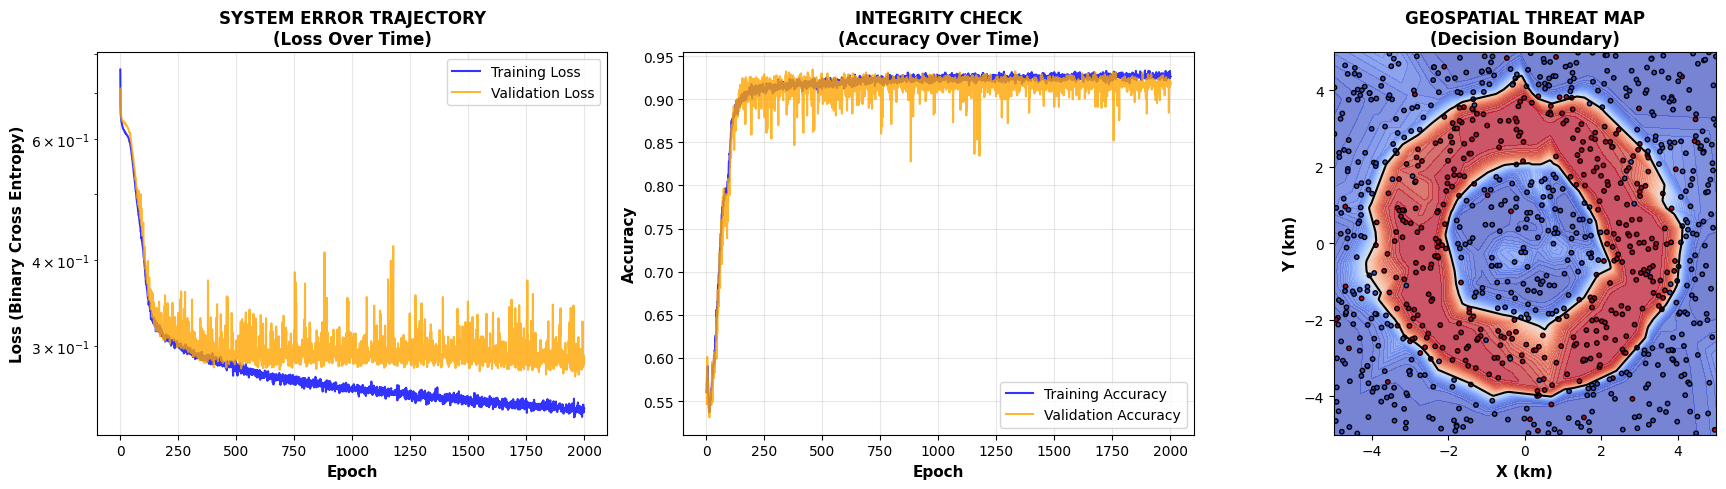

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax1 = axes[0]
epochs_range = range(1, num_epochs + 1)
ax1.plot(epochs_range, train_losses[:num_epochs], 'b-', linewidth=1.5, label='Training Loss', alpha=0.8)
ax1.plot(epochs_range, val_losses[:num_epochs], 'orange', linewidth=1.5, label='Validation Loss', alpha=0.8)
ax1.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax1.set_ylabel('Loss (Binary Cross Entropy)', fontsize=11, fontweight='bold')
ax1.set_title('SYSTEM ERROR TRAJECTORY\n(Loss Over Time)', fontsize=12, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_yscale('log')

ax2 = axes[1]
ax2.plot(epochs_range, train_accuracies[:num_epochs], 'b-', linewidth=1.5, label='Training Accuracy', alpha=0.8)
ax2.plot(epochs_range, val_accuracies[:num_epochs], 'orange', linewidth=1.5, label='Validation Accuracy', alpha=0.8)
ax2.set_xlabel('Epoch', fontsize=11, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax2.set_title('INTEGRITY CHECK\n(Accuracy Over Time)', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.grid(True, alpha=0.3)

ax3 = axes[2]
xx, yy = np.meshgrid(
    np.linspace(-5, 5, 300),
    np.linspace(-5, 5, 300)
)

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    probs = mlp.forward(grid).reshape(xx.shape)

ax3.contourf(xx, yy, probs, levels=50, cmap="coolwarm", alpha=0.7)
ax3.contour(xx, yy, probs, levels=[0.5], colors='black')
ax3.scatter(
    X_val[:, 0], X_val[:, 1],
    c=y_val[:, 0],
    cmap="coolwarm",
    edgecolors="k",
    s=10
)
ax3.set_title('GEOSPATIAL THREAT MAP\n(Decision Boundary)', fontsize=12, fontweight='bold')
ax3.set_xlabel('X (km)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Y (km)', fontsize=11, fontweight='bold')
ax3.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()